In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

from tensorflow.keras.datasets import fashion_mnist

fashion_mnist=tf.keras.datasets.fashion_mnist
#after doing this there is no need to apply train test split
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()


In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
x_test.shape

(10000, 28, 28)

In [34]:
# No of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)


Number of classes: 10


In [35]:
# b. Compute and display the dimensions of each image
image_height, image_width = x_train.shape[1], x_train.shape[2]
print("Image dimensions:", image_height, "x", image_width)


Image dimensions: 28 x 28


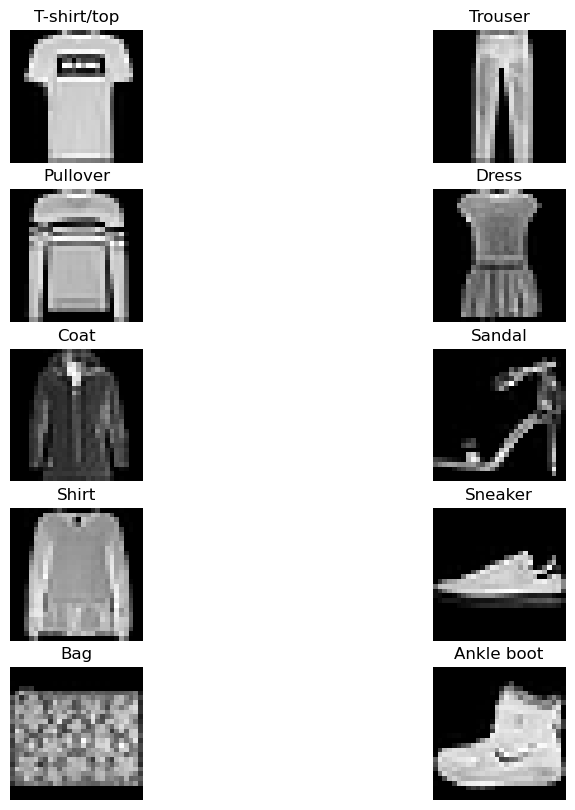

In [36]:
# display one mage from each class


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display one image from each class with labels
class_indices = [np.where(y_train == i)[0][0] for i in range(len(class_names))]
plt.figure(figsize=(10, 10))
for i, index in enumerate(class_indices):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

#plt.imshow(x_train[id[i]],cmap="gray")

In [37]:
# min_max normalization

x_train=x_train/255.0
x_test=x_test/255.0


In [38]:
# padding = same , valid 
#"Same" Padding: Output feature map has the same spatial dimensions as the input. Padding is added to ensure that the filter fully covers the input without going outside its boundaries.
#"Valid" Padding: No padding is added, and the output feature map will have smaller spatial dimensions compared to the input.


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Define the FCNN architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_data=(x_test,y_test), verbose=2)




Epoch 1/15
938/938 - 4s - loss: 0.5138 - sparse_categorical_accuracy: 0.8210 - val_loss: 0.4209 - val_sparse_categorical_accuracy: 0.8501 - 4s/epoch - 4ms/step
Epoch 2/15
938/938 - 3s - loss: 0.3735 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.4050 - val_sparse_categorical_accuracy: 0.8523 - 3s/epoch - 3ms/step
Epoch 3/15
938/938 - 3s - loss: 0.3360 - sparse_categorical_accuracy: 0.8775 - val_loss: 0.3691 - val_sparse_categorical_accuracy: 0.8627 - 3s/epoch - 3ms/step
Epoch 4/15
938/938 - 3s - loss: 0.3125 - sparse_categorical_accuracy: 0.8856 - val_loss: 0.3457 - val_sparse_categorical_accuracy: 0.8738 - 3s/epoch - 3ms/step
Epoch 5/15
938/938 - 3s - loss: 0.2966 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.3542 - val_sparse_categorical_accuracy: 0.8750 - 3s/epoch - 3ms/step
Epoch 6/15
938/938 - 3s - loss: 0.2820 - sparse_categorical_accuracy: 0.8960 - val_loss: 0.3464 - val_sparse_categorical_accuracy: 0.8729 - 3s/epoch - 4ms/step
Epoch 7/15
938/938 - 4s - loss: 0.2671 -

In [39]:
fcnn_test_loss, fcnn_test_accuracy = model.evaluate(x_test, y_test, verbose=0)
# cnn2_test_loss, cnn2_test_accuracy = cnn2_model.evaluate(x_test, y_test, verbose=0)


print("FCNN Test Accuracy:", fcnn_test_accuracy)


FCNN Test Accuracy: 0.8895999789237976


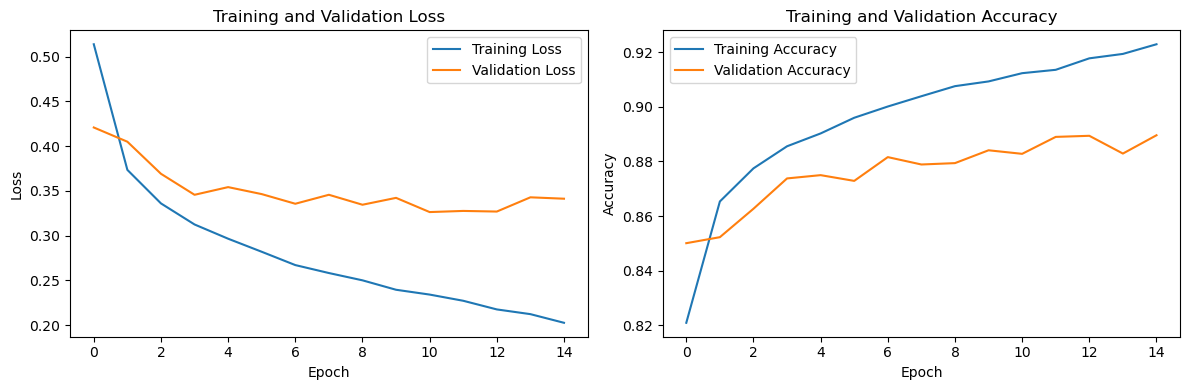

In [40]:
# Plot performance curves
plt.figure(figsize=(12, 4))

# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam

# Reshape images to add channel dimension (required for convolutional layers)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# CNN-1
cnn1_model = Sequential([
    Conv2D(32, (5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# CNN-2
cnn2_model = Sequential([
    Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])



In [42]:
# Compile models
for model in [cnn1_model, cnn2_model]:
    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=[SparseCategoricalAccuracy()])

# Train models
epochs = 15
history_cnn1 = cnn1_model.fit(x_train, y_train, epochs=epochs, batch_size=64,
                              validation_data=(x_test, y_test), verbose=2)
history_cnn2 = cnn2_model.fit(x_train, y_train, epochs=epochs, batch_size=64,
                              validation_data=(x_test, y_test), verbose=2)


Epoch 1/15
938/938 - 20s - loss: 0.4278 - sparse_categorical_accuracy: 0.8486 - val_loss: 0.3375 - val_sparse_categorical_accuracy: 0.8778 - 20s/epoch - 21ms/step
Epoch 2/15
938/938 - 19s - loss: 0.2918 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.3096 - val_sparse_categorical_accuracy: 0.8908 - 19s/epoch - 20ms/step
Epoch 3/15
938/938 - 19s - loss: 0.2484 - sparse_categorical_accuracy: 0.9104 - val_loss: 0.2659 - val_sparse_categorical_accuracy: 0.9041 - 19s/epoch - 20ms/step
Epoch 4/15
938/938 - 19s - loss: 0.2194 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 0.9036 - 19s/epoch - 20ms/step
Epoch 5/15
938/938 - 19s - loss: 0.1945 - sparse_categorical_accuracy: 0.9283 - val_loss: 0.2689 - val_sparse_categorical_accuracy: 0.9047 - 19s/epoch - 20ms/step
Epoch 6/15
938/938 - 18s - loss: 0.1742 - sparse_categorical_accuracy: 0.9356 - val_loss: 0.2484 - val_sparse_categorical_accuracy: 0.9136 - 18s/epoch - 19ms/step
Epoch 7/15
938/938 - 1

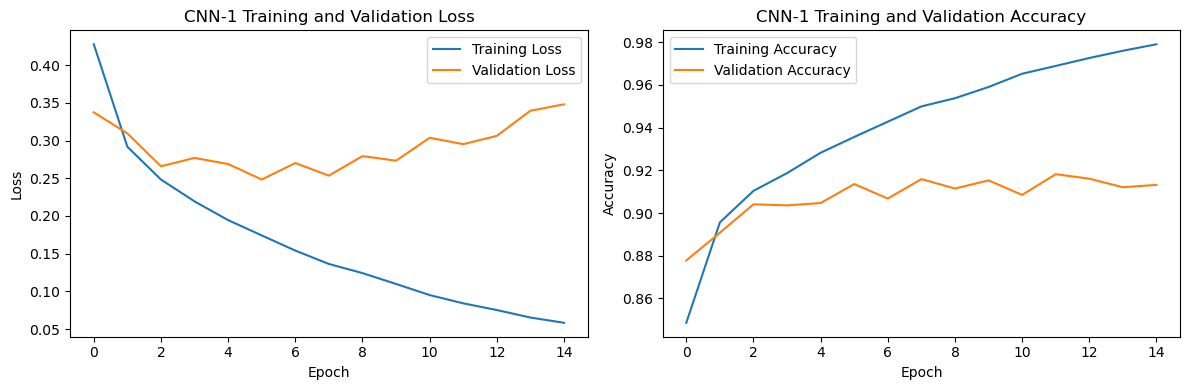

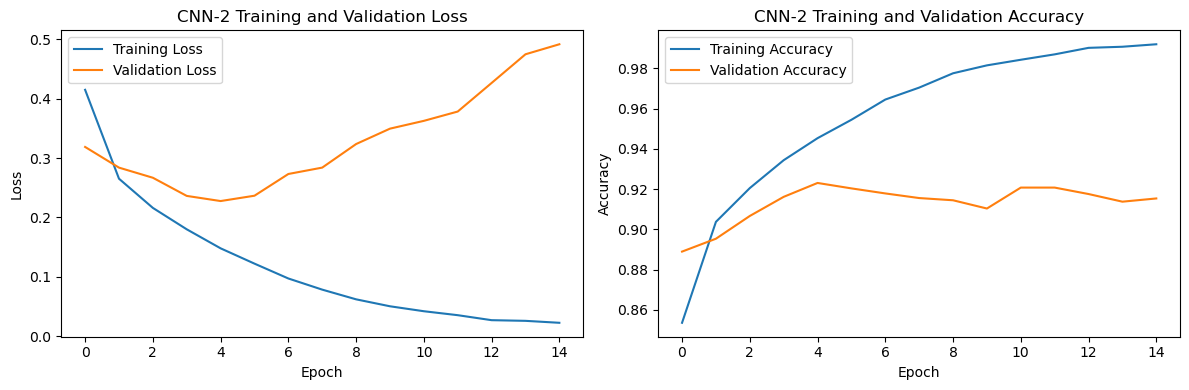

In [43]:

# Plot performance curves
plt.figure(figsize=(12, 4))

# Plot training loss and validation loss for CNN-1
plt.subplot(1, 2, 1)
plt.plot(history_cnn1.history['loss'], label='Training Loss')
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN-1 Training and Validation Loss')
plt.legend()

# Plot training accuracy and validation accuracy for CNN-1
plt.subplot(1, 2, 2)
plt.plot(history_cnn1.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history_cnn1.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN-1 Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot performance curves for CNN-2
plt.figure(figsize=(12, 4))

# Plot training loss and validation loss for CNN-2
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['loss'], label='Training Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN-2 Training and Validation Loss')
plt.legend()

# Plot training accuracy and validation accuracy for CNN-2
plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history_cnn2.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN-2 Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
#Q4 Compare the performances of FCNN and CNN.

cnn1_test_loss, cnn1_test_accuracy = cnn1_model.evaluate(x_test, y_test, verbose=0)
cnn2_test_loss, cnn2_test_accuracy = cnn2_model.evaluate(x_test, y_test, verbose=0)

print("CNN-1 Test Accuracy:", cnn1_test_accuracy)
print("CNN-2 Test Accuracy:", cnn2_test_accuracy)
print("FCNN Test Accuracy:", fcnn_test_accuracy)

CNN-1 Test Accuracy: 0.9132000207901001
CNN-2 Test Accuracy: 0.9154000282287598
FCNN Test Accuracy: 0.8895999789237976


In [47]:
# Compare the number of parameters in the FCNN and the CNN.

print("FCNN - Specific Parameters:")
for layer in model.layers:
    print(f"{layer.name} - Number of parameters: {layer.count_params()}")

# Print specific parameters for CNN
print("\nCNN-1 - Specific Parameters:")
for layer in cnn1_model.layers:
    print(f"{layer.name} - Number of parameters: {layer.count_params()}")

print("\nCNN-2 - Specific Parameters:")
for layer in cnn2_model.layers:
    print(f"{layer.name} - Number of parameters: {layer.count_params()}")
    
    
# Print total number of parameters
print("\nTotal number of parameters:")
print(f"FCNN Total parameters: {model.count_params()}")
print(f"CNN-1 Total parameters: {cnn1_model.count_params()}")
print(f"CNN-2 Total parameters: {cnn2_model.count_params()}")


FCNN - Specific Parameters:
conv2d_2 - Number of parameters: 320
conv2d_3 - Number of parameters: 9248
max_pooling2d_2 - Number of parameters: 0
flatten_5 - Number of parameters: 0
dense_13 - Number of parameters: 460900
dense_14 - Number of parameters: 1010

CNN-1 - Specific Parameters:
conv2d_1 - Number of parameters: 832
max_pooling2d_1 - Number of parameters: 0
flatten_4 - Number of parameters: 0
dense_11 - Number of parameters: 460900
dense_12 - Number of parameters: 1010

CNN-2 - Specific Parameters:
conv2d_2 - Number of parameters: 320
conv2d_3 - Number of parameters: 9248
max_pooling2d_2 - Number of parameters: 0
flatten_5 - Number of parameters: 0
dense_13 - Number of parameters: 460900
dense_14 - Number of parameters: 1010

Total number of parameters:
FCNN Total parameters: 471478
CNN-1 Total parameters: 462742
CNN-2 Total parameters: 471478
